In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.style.use('ggplot')

%matplotlib inline

In [5]:
df = pd.read_csv('metrics/training_confusion2.csv')

In [6]:
breeds = np.unique(df['actual'].values)

In [7]:
cm = confusion_matrix(df['actual'], df['pred'], labels=breeds)
#sns.set(font_scale=1)

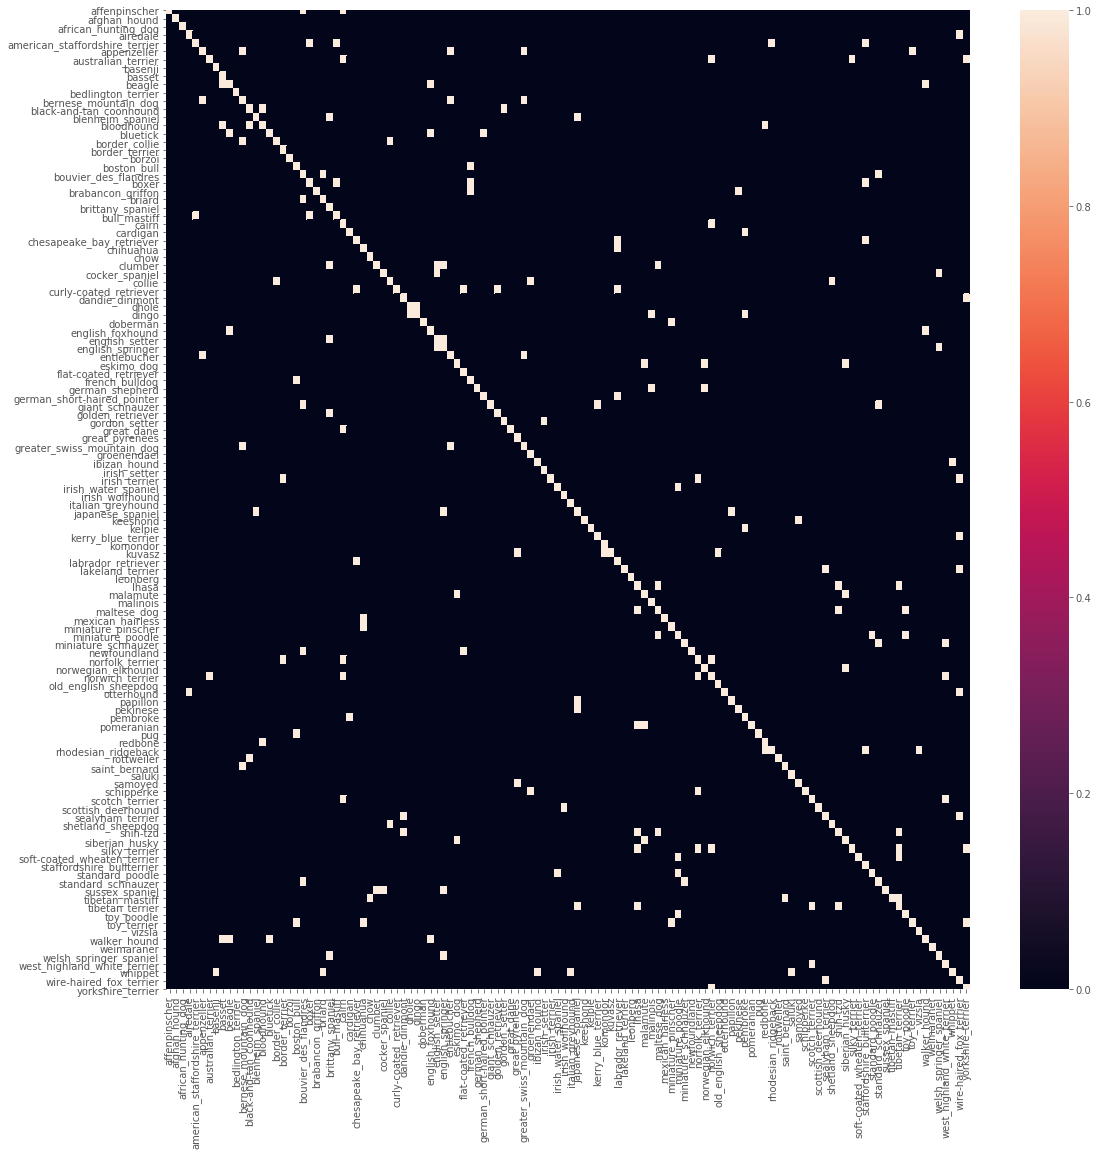

In [8]:
fig, ax = plt.subplots(figsize=(18, 18))
_ = sns.heatmap(cm, ax=ax, yticklabels=breeds, xticklabels=breeds, robust=True)

In [9]:
df['count'] = 1

In [10]:
misclass_df = df[df['actual'] != df['pred']].groupby(['actual', 'pred']).sum().sort_values(['count'], ascending=False).reset_index()
misclass_df['pair'] = misclass_df['actual'] + ' / ' + misclass_df['pred']
misclass_df = misclass_df[['pair', 'count']].take(range(30))

misclass_df.sort_values(['count']).plot.barh(figsize=(8, 10), x=misclass_df['pair'])

KeyError: "None of [Index(['american_staffordshire_terrier / staffordshire_bullterrier',\n       'siberian_husky / malamute', 'siberian_husky / eskimo_dog',\n       'english_foxhound / walker_hound', 'eskimo_dog / malamute',\n       'lakeland_terrier / wire-haired_fox_terrier', 'collie / border_collie',\n       'miniature_poodle / toy_poodle', 'cardigan / pembroke',\n       'entlebucher / greater_swiss_mountain_dog',\n       'silky_terrier / yorkshire_terrier', 'whippet / italian_greyhound',\n       'appenzeller / greater_swiss_mountain_dog',\n       'collie / shetland_sheepdog', 'scottish_deerhound / irish_wolfhound',\n       'lhasa / shih-tzu', 'australian_terrier / yorkshire_terrier',\n       'eskimo_dog / siberian_husky', 'norwich_terrier / norfolk_terrier',\n       'australian_terrier / norwich_terrier', 'toy_poodle / miniature_poodle',\n       'entlebucher / appenzeller', 'standard_schnauzer / miniature_schnauzer',\n       'norfolk_terrier / norwich_terrier',\n       'blenheim_spaniel / japanese_spaniel',\n       'bernese_mountain_dog / appenzeller',\n       'australian_terrier / silky_terrier',\n       'appenzeller / bernese_mountain_dog',\n       'scotch_terrier / west_highland_white_terrier',\n       'giant_schnauzer / standard_schnauzer'],\n      dtype='object')] are in the [columns]"